In [1]:
import sys
import os

sys.path.insert(1, '/Users/louis/Desktop/PHYSICS 2/UROP prep/synthPy')
import field_generator.gaussian1D as g1
import matplotlib.pyplot as plt
import numpy as np
import utils.cmpspec as cm

Generate a 1D field using FFT method.

In [2]:
def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 0.5)

n = 1000
field_1D = g1.gaussian1D(k41)

/var/folders/_9/lmhm0v9x3mqgy_x7whwcmxxm0000gn/T/ipykernel_7644/2206358136.py:2: RuntimeWarning: divide by zero encountered in power
  return k**-a
/Users/louis/Desktop/PHYSICS 2/UROP prep/synthPy/field_generator/gaussian1D.py:142: RuntimeWarning: invalid value encountered in multiply
  F = W*np.sqrt(self.k_func(K)) # power spectra follows power law, so sqrt here.


Text(0, 0.5, 'noise')

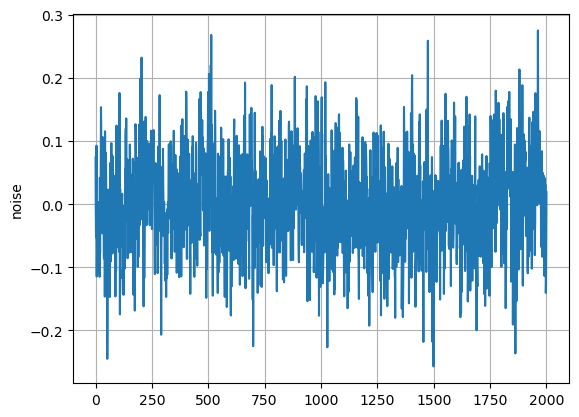

In [3]:
d = 1
sig = field_1D.fft(n)


plt.plot(sig)
plt.grid()
plt.ylabel('noise')

Calculate the Power Spectrum:

/var/folders/_9/lmhm0v9x3mqgy_x7whwcmxxm0000gn/T/ipykernel_7644/2206358136.py:2: RuntimeWarning: divide by zero encountered in power
  return k**-a


0.0


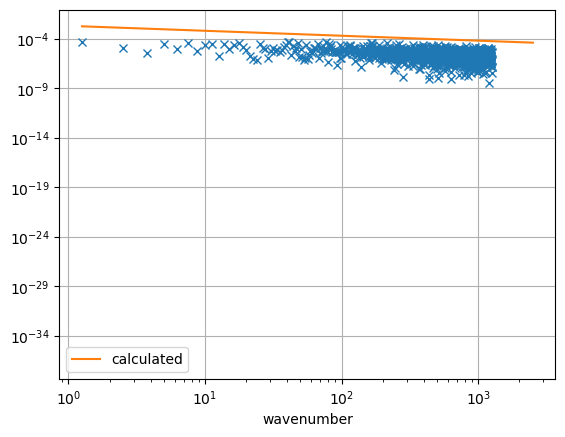

In [4]:


_, wn, ps = cm.compute1Dspectrum(sig, 5)
plt.plot(wn,ps, 'x')
plt.plot(wn, 0.002*k41(wn), label = 'calculated')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('wavenumber')

print(np.min(wn))



3D generation:

In [5]:
import gaussian3D as g3

field_3D = g3.gaussian3D(k41)
N = 100
sig = field_3D.fft(100)

ModuleNotFoundError: No module named 'gaussian3D'

plot data


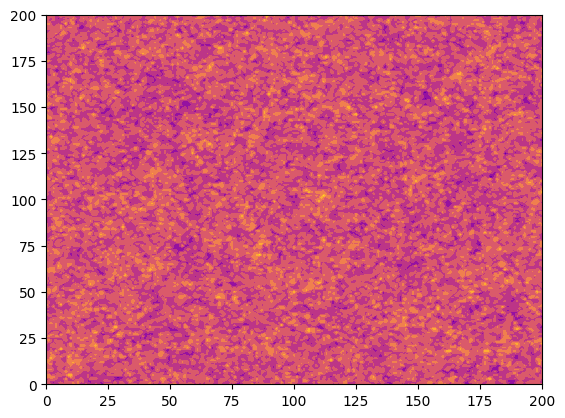

In [ ]:
ax, fig = plt.subplots()
M = 2*N +1
X, Y = np.meshgrid(np.arange(0,201),np.arange(0,201))
cp = plt.contourf(X, Y, sig[:,:,1], cmap = 'plasma')


2D GEN AND SAVE TEST

In [ ]:
import gaussian2D as g2

field_2D = g2.gaussian2D(k41)
N = 100
sig = field_2D.fft(100)

C:\Users\UROP\AppData\Local\Temp\ipykernel_11860\981145541.py:2: RuntimeWarning: divide by zero encountered in power
  return k**-a
C:\Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy/field_generator\gaussian2D.py:176: RuntimeWarning: invalid value encountered in multiply
  F = W*np.sqrt(self.k_func(K)) # power spectra follows power law, so sqrt here.


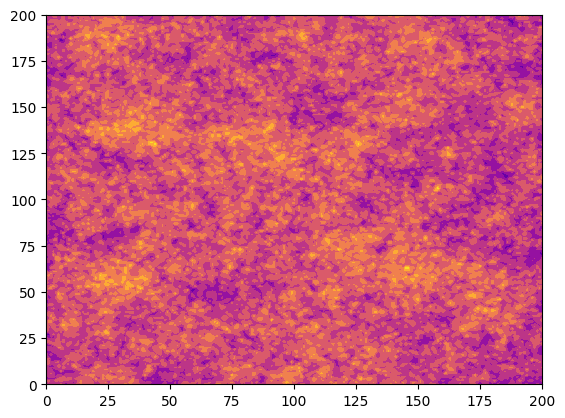

In [ ]:
ax, fig = plt.subplots()
M = 2*N +1
X, Y = np.meshgrid(np.arange(0,201),np.arange(0,201))
cp = plt.contourf(X, Y, sig[:,:], cmap = 'plasma')

New FFT gen:

/var/folders/_9/lmhm0v9x3mqgy_x7whwcmxxm0000gn/T/ipykernel_7644/2816917192.py:15: RuntimeWarning: divide by zero encountered in power
  return k**-a
/var/folders/_9/lmhm0v9x3mqgy_x7whwcmxxm0000gn/T/ipykernel_7644/2816917192.py:15: RuntimeWarning: invalid value encountered in power
  return k**-a


[[Model]]
    <lmfit.ExpressionModel('c*x + a')>
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 3183
    # variables        = 2
    chi-square         = 5084.68092
    reduced chi-square = 1.59845361
    Akaike info crit   = 1494.94308
    Bayesian info crit = 1507.07424
    R-squared          = 0.76326507
[[Variables]]
    c: -2.30164368 +/- 0.02272740 (0.99%) (init = -1.666667)
    a: -29.3361428 +/- 0.13621614 (0.46%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, a) = -0.9864


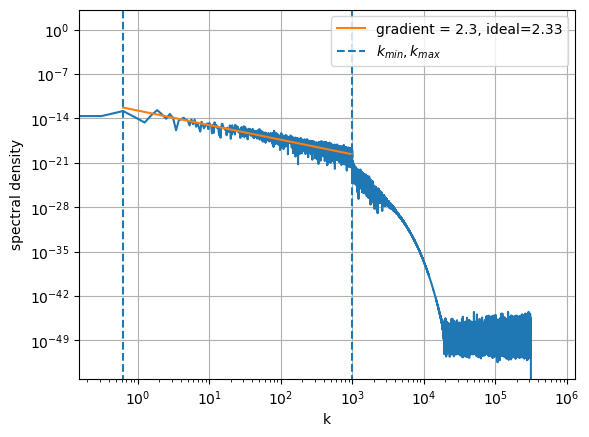

In [67]:
from importlib import reload
import field_generator.new_fft_1D as f1
reload(f1)



l_max = 10

extent = 10

res = 1000000

l_min = 2*np.pi/(10**3)
def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 7/3)


x, noise =f1.fft_1D(l_max, l_min, extent, res, k41)

# plt.plot(x, noise)
# plt.show()

import utils.cmpspec as cm 
import utils.calculate_spectrum_3d as c3s


_, wn, ps = cm.compute1Dspectrum(noise, 2*extent)

# wn, ps = c3s.spectrum_1D_scalar(noise, l_min)


plt.plot(wn, ps)




# plt.xscale('log')
# plt.yscale('log')

k_min, k_max = 2*np.pi/l_max, 2*np.pi/l_min

min_i = np.where(np.round(wn, 0) == np.round(k_min, 0))[0][0]
max_i = np.where(np.round(wn, 0) == np.round(k_max, 0))[0][-1]




plt.xscale('log')
plt.yscale('log')

from lmfit.models import ExpressionModel
mod = ExpressionModel('c*x + a')
mod.make_params()
mod.set_param_hint('a', value = 1)
mod.set_param_hint('c', value = -5/3)
res0     =   mod.fit(np.array(np.log(ps[min_i : max_i + 1])), x = np.log(wn[min_i : max_i + 1]), nan_policy='omit')
print(res0.fit_report())

plt.plot(wn[min_i : max_i + 1], np.exp(res0.best_fit), label = f"gradient = {np.round(-res0.params['c'].value, 2)}, ideal={np.round(7/3, 2)}")





plt.xlabel('k')
plt.ylabel('spectral density')
plt.vlines([2*np.pi/l_max, 2*np.pi/l_min], 0, 2500, linestyle = 'dashed', label = '$k_{min}, k_{max}$')
plt.grid()
plt.legend()
plt.show()